# Módulo 9: TdD III - Agregações e operações em grupos

# Exercício 1

Trabalharemos com a base de dados "SINASCI_RO_2019.CSV" para o desenvolvimento das habilidades em **groupby**.

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [264]:
# importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [265]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('SINASCI_RO_2019.csv')
df_sinasci = pd.DataFrame(arquivo)


# informações sobre os dados

df_sinasci.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [266]:
# idade média dos pais por município

municipio = 'munResNome'

consulta = df_sinasci.groupby(municipio)[['IDADEMAE', 'IDADEPAI']].mean()
consulta = consulta.round(2)

print("\n")
print(consulta)




                           IDADEMAE  IDADEPAI
munResNome                                   
Alta Floresta D'Oeste         25.99     29.55
Alto Alegre dos Parecis       24.84     29.18
Alto Paraíso                  24.96     28.83
Alvorada D'Oeste              25.77     30.76
Ariquemes                     25.61     32.47
Buritis                       25.56     30.81
Cabixi                        26.04     34.33
Cacaulândia                   25.55     36.33
Cacoal                        26.89     30.93
Campo Novo de Rondônia        24.83     30.50
Candeias do Jamari            25.24     29.89
Castanheiras                  27.28     30.39
Cerejeiras                    27.24     31.65
Chupinguaia                   25.33     29.63
Colorado do Oeste             27.60     34.35
Corumbiara                    24.72     32.47
Costa Marques                 24.41     30.61
Cujubim                       24.48     31.40
Espigão D'Oeste               26.09     31.20
Governador Jorge Teixeira     24

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [267]:
# peso médio dos bebês por sexo pela data em 16/11/2019


# coluna "object" para "datatime"
df_sinasci['DTNASC'] = pd.to_datetime(df_sinasci['DTNASC']) 

data = df_sinasci[df_sinasci['DTNASC'] == '2019-11-16']

peso_medio = data.groupby(['ESCMAE', 'SEXO'])['PESO'].mean()
peso_medio = peso_medio.round(2)

print("\n")
print(peso_medio)
print("\n")



ESCMAE           SEXO     
12 anos ou mais  Feminino     3089.00
                 Masculino    3547.50
4 a 7 anos       Feminino     3230.00
                 Masculino    3026.67
8 a 11 anos      Feminino     3144.43
                 Masculino    3487.35
Name: PESO, dtype: float64




### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [268]:
# separando dataframe com as colunas alvo

df_sinasci_2 = df_sinasci[['munResNome', 'IDADEMAE', 'IDADEPAI']]


In [269]:
# município com MENOS nascimentos

nascimentos = df_sinasci[df_sinasci['DTNASC'].dt.year == 2019]
menos_nascimentos_nome = nascimentos['munResNome'].value_counts().idxmin()
menos_nascimentos_qtde = nascimentos[nascimentos['munResNome'] == menos_nascimentos].shape[0]

print("\n")
print(f" O município com MENOS nascimentos é '{menos_nascimentos_nome}' com {menos_nascimentos_qtde} nascimento(s).")
print("\n")




 O município com MENOS nascimentos é 'Município ignorado - RO' com 1 nascimento(s).




In [270]:
# qual a média de idade dos pais neste município

municipio = menos_nascimentos_nome

nascimentos_municipio = df_sinasci_2[df_sinasci_2['munResNome'] == municipio]
estatisticas_idades_municipio = nascimentos[['IDADEMAE', 'IDADEPAI']].agg(['min', 'median', 'max'])

print("\n")
print(f" Média das idades dos pais em '{municipio_selecionado}':")
print("\n")
print(estatisticas_idades_municipio)
print("\n")




 Média das idades dos pais em 'Município ignorado - RO':


        IDADEMAE  IDADEPAI
min         11.0      15.0
median      26.0      30.0
max         53.0      86.0




### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [271]:
# separando dataframe com as colunas alvo

df_sinasci_2 = df_sinasci[['munResNome', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']]


In [272]:
# município com MAIS nascimentos

nascimentos = df_sinasci[df_sinasci['DTNASC'].dt.year == 2019]
mais_nascimentos_nome = nascimentos['munResNome'].value_counts().idxmax()
mais_nascimentos_qtde = nascimentos[nascimentos['munResNome'] == mais_nascimentos_nome].shape[0]

print("\n")
print(f" O município com MAIS nascimentos é '{mais_nascimentos_nome}' com {mais_nascimentos_qtde} nascimento(s).")
print("\n")




 O município com MAIS nascimentos é 'Porto Velho' com 8437 nascimento(s).




In [273]:
# qual a média de idade dos pais neste município

municipio = mais_nascimentos_nome

nascimentos_municipio = df_sinasci_2[df_sinasci_2['munResNome'] == municipio]
estatisticas_idades_municipio = nascimentos_municipio[['IDADEMAE', 'IDADEPAI']].agg(['min', 'median', 'max'])

print("\n")
print(f" Média das idades dos pais em '{municipio_selecionado}':")
print("\n")
print(estatisticas_idades_municipio)
print("\n")




 Média das idades dos pais em 'Município ignorado - RO':


        IDADEMAE  IDADEPAI
min         12.0      16.0
median      26.0      32.0
max         47.0      65.0




### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [274]:
# município que MAIS nasceu bebês no mês de MARÇO


nascimentos = df_sinasci[df_sinasci['DTNASC'].dt.month == 3]
mais_nascimentos_nome = nascimentos['munResNome'].value_counts().idxmax()
mais_nascimentos_qtde = nascimentos[nascimentos['munResNome'] == mais_nascimentos_nome].shape[0]

print("\n")
print(f" O município com MAIS nascimentos é '{mais_nascimentos_nome}' com {mais_nascimentos_qtde} nascimento(s) em março de 2019.")
print("\n")



 O município com MAIS nascimentos é 'Porto Velho' com 744 nascimento(s) em março de 2019.




In [275]:
# qual a quantidade, média, max e min de "filhos vivos"

municipio = mais_nascimentos_nome

nascimentos_municipio = df_sinasci_2[df_sinasci_2['munResNome'] == municipio]
estatisticas_idades_municipio = nascimentos_municipio['QTDFILVIVO'].agg(['min', 'median', 'max'])

print("\n")
print(f" A média, minímo e máximo da quantidade de FILHOS VIVOS em '{municipio_selecionado}':")
print("\n")
print(estatisticas_idades_municipio)
print("\n")




 A média, minímo e máximo da quantidade de FILHOS VIVOS em 'Município ignorado - RO':


min        0.0
median     1.0
max       12.0
Name: QTDFILVIVO, dtype: float64




In [276]:
# qual a média de idade dos pais neste município = mais nasceu bebês no mês de março

municipio = mais_nascimentos_nome

nascimentos_municipio = df_sinasci_2[df_sinasci_2['munResNome'] == municipio]
estatisticas_idades_municipio = nascimentos_municipio[['IDADEMAE', 'IDADEPAI']].agg(['min', 'median', 'max'])

print("\n")
print(f" Média das idades dos pais em '{municipio_selecionado}':")
print("\n")
print(estatisticas_idades_municipio)
print("\n")




 Média das idades dos pais em 'Município ignorado - RO':


        IDADEMAE  IDADEPAI
min         12.0      16.0
median      26.0      32.0
max         47.0      65.0




### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

#### Insight 1:
- Comparaçao da média dos pesos dos bebês por tipo de PARTO: vaginal ou cesáreo;
- Não há diferença significativa na média dos pesos dos bebês;

In [277]:
# separando dataframe com as colunas alvo

df_sinasci_2 = df_sinasci[['PARTO', 'PESO']]

In [278]:
# média do peso

media_peso = df_sinasci_2.groupby('PARTO')['PESO'].mean()


print("\nMédia dos Pesos por Tipo de Parto:")
print("\n")
print(media_peso)
print("\n")




Média dos Pesos por Tipo de Parto:


PARTO
Cesáreo    3270.490408
Vaginal    3189.155205
Name: PESO, dtype: float64




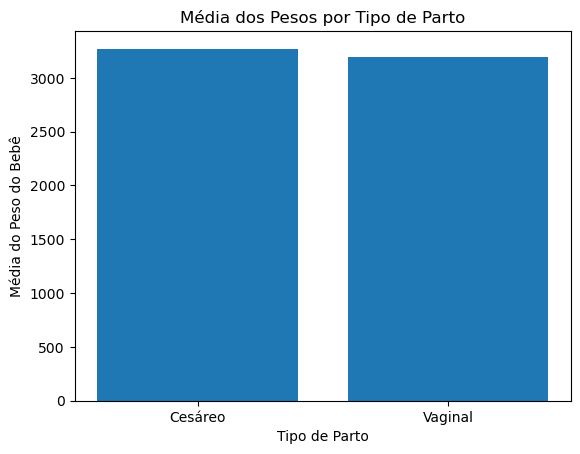

In [279]:
# gráfico

plt.bar(media_peso.index, media_peso.values)
plt.title('Média dos Pesos por Tipo de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Média do Peso do Bebê')
plt.show()

#### Insight 2:
- Comparação da média do peso dos bebês com a idade das mães;
- Não há diferença significativa na média dos pesos dos bebês em relação à idade da mãe;

In [280]:
# separando dataframe com as colunas alvo

df_sinasci_2 = df_sinasci[['IDADEMAE', 'SEXO','PESO']]

In [281]:
# peso médio dos bebês por idade da mãe

peso_medio = data.groupby(['IDADEMAE'])['PESO'].mean()
peso_medio = peso_medio.round(2)

print("\n")
print(peso_medio)
print("\n")



IDADEMAE
14    2920.00
16    3206.67
17    3030.00
19    3190.00
20    3405.00
21    2716.60
22    3835.00
23    2870.00
24    3080.00
25    3760.00
26    3587.50
27    3720.00
28    3670.71
29    3803.75
30    3330.00
31    2670.00
33    2805.00
34    3437.50
35    2482.50
37    2550.00
42    3560.00
Name: PESO, dtype: float64




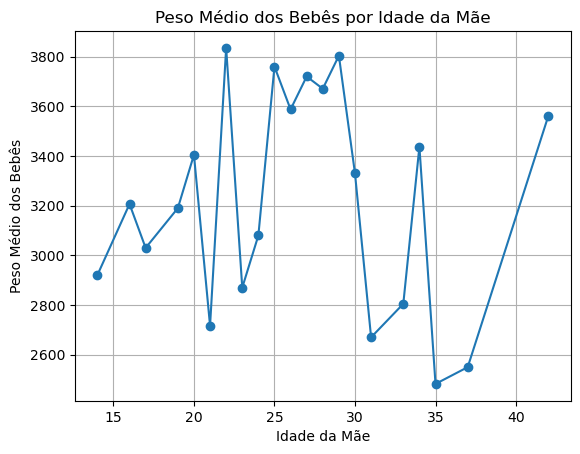

In [282]:
# gráfico

# criando um índice
peso_medio.index


plt.plot(peso_medio.index, peso_medio.values, marker='o', linestyle='-')


plt.xlabel('Idade da Mãe')
plt.ylabel('Peso Médio dos Bebês')
plt.title('Peso Médio dos Bebês por Idade da Mãe')
plt.grid(True)
plt.show()


#### Insight 3:
- Comparação da média dos APGAR1 e APGAR5 em relação como o diagnóstico de ANOMALIA;
- Na média não há relação dos baixos índices de APGAR1 e APGAR5 com o diagnóstico de ANOMALIA;

In [283]:
# separando dataframe com as colunas alvo

df_sinasci_2 = df_sinasci[['IDANOMAL','APGAR1', 'APGAR5']]

In [284]:
# qual a média dos APGAR1 e APGAR5 em relação ao diagnóstico de ANOMALIA

anomalia = df_sinasci_2[df_sinasci_2['IDANOMAL']==1]
apgar_media = anomalia.groupby('IDANOMAL')[['APGAR1', 'APGAR5']].mean()

print("\n")
print(f" Média de APGAR1 e APGAR5 em relaçao ao diagnóstico de ANOMALIA:")
print("\n")
print(apgar_media)
print("\n")




 Média de APGAR1 e APGAR5 em relaçao ao diagnóstico de ANOMALIA:


            APGAR1    APGAR5
IDANOMAL                    
1.0       7.208531  8.369668




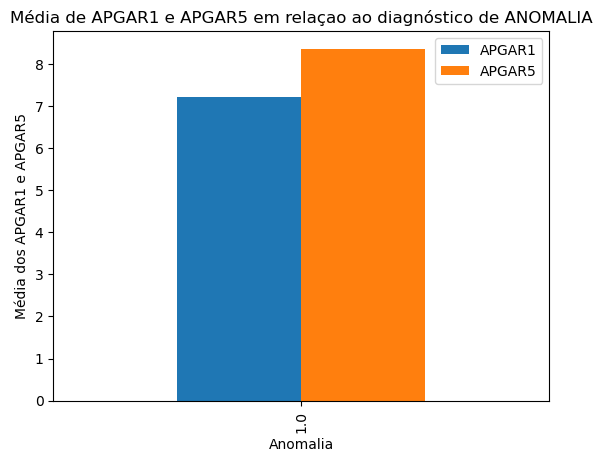

In [285]:
# gráfico
apgar_media.plot(kind='bar', title='Média de APGAR1 e APGAR5 em relaçao ao diagnóstico de ANOMALIA')
plt.xlabel('Anomalia')
plt.ylabel('Média dos APGAR1 e APGAR5')
plt.show()